In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import functools
import pickle
from operator import add
import uncertainty_toolbox as uct
import matplotlib as mpl
from alpdesign.utils import *
from alpdesign.mlp import *
from jax_unirep import get_reps
import alpdesign
import os

%matplotlib inline

#mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
def current_best(ys):
    curr_best = [ys[0]]
    for i, y in enumerate(ys):
        if i == 0:
            continue
        curr_best.append(max(ys[:i]))
    return curr_best

(100,)


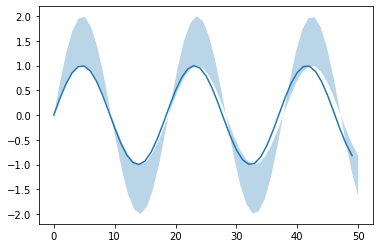

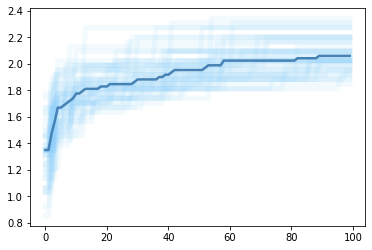

In [31]:
x = np.linspace(0,50,50)
y1 = np.sin(1/3*x)
y2 = 2* np.sin(1/3*x)
plt.figure(1)
ax = plt.gca()
ax.plot(y1)
#ax.plot(y2)
ax.fill_between(x, y1, y2, alpha=0.3)

y_random = []
for i in range(50):
    with open('random_result/y{0}.pkl'.format(i), 'rb') as f:
        y_random.append(current_best(pickle.load(f)))
y_random = np.array(y_random)
y_random_q = np.quantile(y_random, 1/3, axis=0)
print(y_random_q.shape)
y_random_median = np.median(y_random, axis=0)
plt.figure()
ax = plt.gca()
y_random_mean = y_random[0]
for i in range(1,50):
    #y_random_mean = list(map(add, y_random[i], y_random_mean))
    ax.plot(y_random[i], alpha=0.1, linewidth=5, color='lightskyblue')
#y_random_mean = [y_m/100 for y_m in y_random_mean]
for i in range(0, 5):
    q = 0.2 + 0.8 / 5 * i
    qt = np.quantile(y_random, q, axis=0)
    #ax.plot(qt, alpha=0.0)
    #ax.fill_between(np.linspace(0,50,50), qt, y_random_mean, alpha=0.3, color='powderblue')
plt.plot(y_random_median, color='steelblue', linewidth=2.5)

2.343655


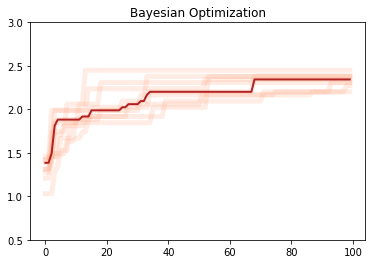

In [48]:
plt.figure()   
ax = plt.gca()    
y_bo = []
for i in range(9):
    with open('./result_e2e_bo/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_bo.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon', linewidth=5)
y_bo = np.array(y_grad_1)

y_bo_median = np.median(y_grad_1, axis=0)
#for i in range(1,32):
    #y_grad_1_mean = list(map(add, current_best(y_grad_1[i]), y_grad_1_mean))
#y_grad_1_mean = [y_m/32 for y_m in y_grad_1_mean] 
ax.plot(y_bo_median, linewidth=2, color='firebrick')
ax.set_title('Bayesian Optimization')
ax.set_ylim([0.5, 3.0])
print(y_bo_median[-1])

In [4]:
%pwd

'/gpfs/fs2/scratch/zyang43/ALP-Design/paper'

2.1483505


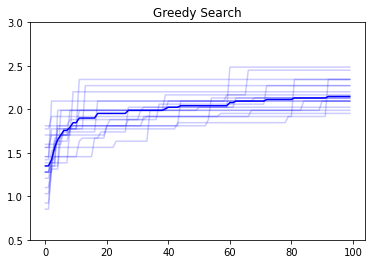

In [47]:
plt.figure()
ax = plt.gca()
y_grad = []
for i in range(19):
    with open('result_e2e_grad/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_grad.append(curr)
        ax.plot(curr, alpha = 0.2, color='b')

y_grad_mean = current_best(y_15[0])
y_grad = np.array(y_15)
y_grad_median = np.median(y_15, axis=0)
#for i in range(1,7):             
    #y_15_mean = list(map(add, current_best(y_15[i]), y_15_mean))
#y_15_mean = [y_m/7 for y_m in y_15_mean] 
ax.plot(y_grad_median, color='b')
ax.set_ylim([0.5, 3.0])
ax.set_title('Greedy Search')
print(y_grad_median[-1])
#plt.plot(current_best(y_15[2]))

FileNotFoundError: [Errno 2] No such file or directory: 'result_10/labels/y_0.pkl'

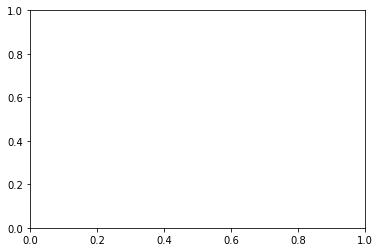

In [46]:
plt.figure()
ax = plt.gca()
y_10 = []
for i in range(19):
    with open('result_10/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_10.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon')
        
y_10 = np.array(y_10)
y_10_median = np.median(y_10, axis=0)
#for i in range(1,10):             
    #y_10_mean = list(map(add, current_best(y_10[i-1]), y_10_mean))
#y_10_mean = [y_m/10 for y_m in y_10_mean] 
#plt.plot(y_10[9])
ax.plot(y_10_median, color='firebrick')
print(y_10_median[-1])

In [6]:
y5 = []
final = []
for root, dirs, files in os.walk("./result_5/labels", topdown=False):
    for name in files:
        file_path = os.path.join(root, name)
        with open(file_path, 'rb') as f:
            curr_best = current_best(pickle.load(f))
            y5.append(curr_best)
            final.append(curr_best[-1])
idx_list = np.argsort(final)  

0.99020904


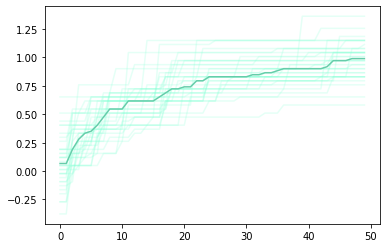

In [8]:
plt.figure()
ax = plt.gca()
y_5 = []
for i in range(34):
    with open('result_5/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_5.append(curr)
        ax.plot(curr, alpha=0.2, color='aquamarine')
y_5 = np.array(y_5)
y_5_mean = y_5[0]
#for i in range(1,14):             
    #y_5_mean = list(map(add, y_5[i], y_5_mean))
#y_5_mean = [y_m/14 for y_m in y_5_mean] 
y_5_median = np.median(y_5, axis=0)
ax.plot(y_5_median, color='mediumaquamarine')
#ax.plot(y_5_mean)
print(y_5_median[-1])

#print(y_5[13])

In [ ]:
plt.figure()
ax = plt.gca()
y_ohc = []
for i in range(4):
    with open('result_e2e_ohc/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_ohc.append(curr)
        ax.plot(curr, alpha=0.4, linewidth=5, color='plum')
y_ohc = np.array(y_ohc)
y_ohc_median = np.median(y_ohc, axis=0)
ax.plot(y_ohc_median, color='purple', linewidth=2)
print(y_ohc_median[-1])

0.9724542


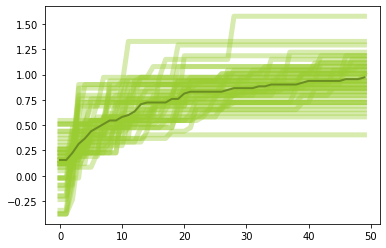

In [8]:
plt.figure()
ax = plt.gca()
y_smooth = []
for i in range(50):
    with open('result_smooth/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_smooth.append(curr)
        ax.plot(curr, alpha=0.4, linewidth=5, color='yellowgreen')
y_smooth = np.array(y_smooth)
y_smooth_median = np.median(y_smooth, axis=0)
ax.plot(y_smooth_median, color='olivedrab', linewidth=2)
print(y_smooth_median[-1])

0.93694425


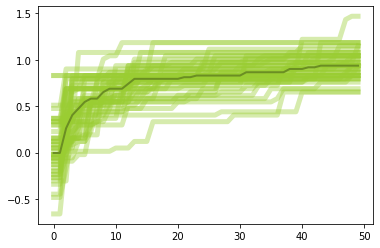

In [4]:
plt.figure()
ax = plt.gca()
y_dropout = []
for i in range(50):
    with open('result_rapid/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_dropout.append(curr)
        ax.plot(curr, alpha=0.4, linewidth=5, color='yellowgreen')
y_dropout = np.array(y_dropout)
y_dropout_median = np.median(y_dropout, axis=0)
ax.plot(y_dropout_median, color='olivedrab', linewidth=2)
print(y_dropout_median[-1])

0.97245413


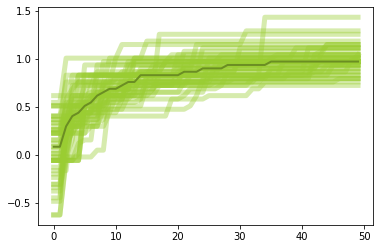

In [3]:
plt.figure()
ax = plt.gca()
y_dropout = []
for i in range(49):
    with open('result_ucb/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_dropout.append(curr)
        ax.plot(curr, alpha=0.4, linewidth=5, color='yellowgreen')
y_dropout = np.array(y_dropout)
y_dropout_median = np.median(y_dropout, axis=0)
ax.plot(y_dropout_median, color='olivedrab', linewidth=2)
print(y_dropout_median[-1])

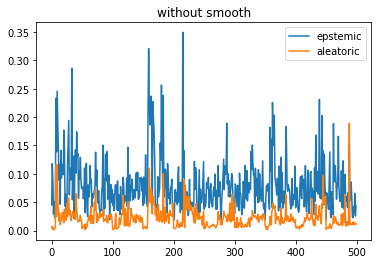

In [29]:
eps1 = []
als = []
plt.figure()
for i in range(10):
    with open('result_neat/uncertainty/epi_ale_{0}.pkl'.format(i), 'rb') as f3:
        eas = pickle.load(f3)
        for ea in eas:
            e, a = ea
            eps1.append(e)
            als.append(a)
plt.plot(eps1, label='epstemic')
plt.plot(als, label='aleatoric')
plt.title('without smooth')
plt.legend()

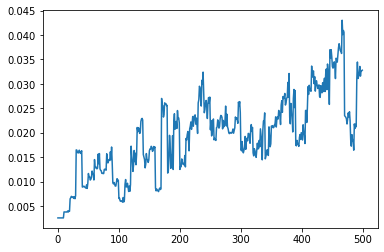

In [28]:
vals = []
plt.figure()
for i in range(1):
    with open('result_smooth/yhats_val/yhat_val_{0}.pkl'.format(i), 'rb') as f3:
        yhats = pickle.load(f3)
        for yhat in yhats:
            val = []
            for y in yhat:
                val.append(y[1])
            vals.append(val)
vals = np.array(vals)
vals = vals.flatten()
#print(len(vals))            
plt.plot(vals, label='epstemic')

#plt.title('without smooth')
#plt.legend()

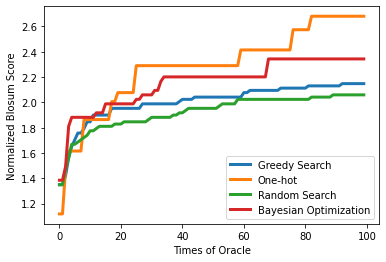

In [49]:


#plt.plot(y_grad_mean, label='grad_mlp2')
plt.plot(y_grad_median, label='Greedy Search',linewidth=3)
plt.plot(y_ohc_median, label='One-hot',linewidth=3)
#plt.plot(y_mean, label='Bayesian Optimization 0')
plt.plot(y_random_median, label='Random Search', linewidth=3)
#plt.plot(y_15_median, label='Bayesian Optimization 15')
#plt.plot(current_best(y_15[2]))
#plt.plot(y_10_median, label='Bayesian Optimization 10')
#plt.plot(y_5_median, label='Bayesian Optimization 5')
#plt.plot(y_hard_median, label='Without Hard Sampling')
plt.plot(y_bo_median, label='Bayesian Optimization',linewidth=3)
plt.xlabel('Times of Oracle')
plt.ylabel('Normalized Blosum Score')

plt.legend()

## Uncertainty-toolbox

In [3]:
uct.viz.set_style()
uct.viz.update_rc("text.usetex", True)  # Set to True for system latex
uct.viz.update_rc("font.size", 14)  # Set font size
uct.viz.update_rc("xtick.labelsize", 14)  # Set font size for xaxis tick labels
uct.viz.update_rc("ytick.labelsize", 14)  # Set font size for yaxis tick labels

# Set random seed
np.random.seed(11)

# Generate synthetic predictive uncertainty results
#n_obs = 650
#f, std, y, x = uct.synthetic_sine_heteroscedastic(n_obs)
#print(y)

# Save figure (set to True to save)
#savefig = True


def make_plots(pred_mean, pred_std, y, plot_save_str="row"):
    """Make set of plots."""

    #ylims = [-3, 3]
    #n_subset = 50
    plt.figure()
    #fig, axs = plt.subplots(1, 3, figsize=(17, 8))

    # Make xy plot
    #axs[0] = uct.plot_xy(
        #pred_mean, pred_std, y, x, n_subset=300, ylims=ylims, xlims=[0, 15], ax=axs[0]
    #)

    # Make ordered intervals plot
    #axs[1] = uct.plot_intervals_ordered(
        #pred_mean, pred_std, y, n_subset=n_subset, ylims=ylims, ax=axs[1]
    #)

    # Make calibration plot
    fig = uct.plot_calibration(pred_mean, pred_std, y)
    return fig

    # Adjust subplots spacing
    #fig.subplots_adjust(wspace=0.25)

    # Save figure
    #if savefig:
        #uct.viz.save_figure(plot_save_str, "svg", white_background=True)


with open('result/predict/yhat0.pkl', 'rb') as f1:
    pred_mean_list = pickle.load(f1)
with open('result/uncertainty/yhat_0.pkl', 'rb') as f2:
    pred_std_list = pickle.load(f2)
    
with open('result/label/y0.pkl', 'rb') as f3:
    y = pickle.load(f3)
def convert_ndarray(ls):
    out = []
    for l in ls:
        out.append(l)
    return np.array(out)
y = convert_ndarray(y)
pred_std_list = convert_ndarray(pred_std_list)
pred_mean_list = convert_ndarray(pred_mean_list)

#print(y)
#print(pred_std_list)
#print(pred_mean_list)
# List of predictive means and standard deviations
#pred_mean_list = [f]

#pred_std_list = [
    #std * 0.5,  # overconfident
    #std * 2.0,  # underconfident
    #std,  # correct
#]

# Loop through, make plots, and compute metrics
idx_counter = 0
'''
for i, pred_mean in enumerate(pred_mean_list):
    for j, pred_std in enumerate(pred_std_list):
        #mace = uct.mean_absolute_calibration_error(pred_mean, pred_std, y)
        #rmsce = uct.root_mean_squared_calibration_error(pred_mean, pred_std, y)
        #ma = uct.miscalibration_area(pred_mean, pred_std, y)

        idx_counter += 1
        make_plots(pred_mean, pred_std, y)

        print(f"MACE: {mace}, RMSCE: {rmsce}, MA: {ma}")
'''

        
fig = make_plots(pred_mean_list, pred_std_list, y)
plt.show(fig)



<Figure size 800x800 with 0 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x1000 with 1 Axes>